In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = ("aviation-accidents.csv")
df = pd.read_csv(dataset)
df
#We import the libraries we will use in data analysis, 
#and create the data frame by importing the csv file

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [2]:
df.isnull().sum()
#Let’s check how many null values there are on the columns in order to operate on the data frame

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

In [3]:
df_fatalities_drop = df['fatalities'].dropna()
#First we will remove the Nan values

def calculate_fatalities(fatalities):
    if '+' in fatalities:
        parts = fatalities.split('+')
        return int(parts[0]) + int(parts[1])
    else:
        return int(fatalities)
df_fatalities_drop = df_fatalities_drop.apply(calculate_fatalities)
#in the fatalities column there is a lot of data listed in the format "n+n"
#we create a function that divides the strings represented in two integers summing them

In [4]:
#Before applying the function 
#Calculate the average of the fatalities to replace it to the missing values
#Apply the function to the copy of the original data frame
fatalities_mean = round(df_fatalities_drop.mean())
fatalities_mean

df_f = df.copy()

fatalities_mean = str(fatalities_mean)
df_f['fatalities'] = df_f['fatalities'].fillna(fatalities_mean)
df_f['fatalities'] = df_f['fatalities'].apply(calculate_fatalities)

In [5]:
#Fill the empty values of the other columns with "unknown object"
df_f['location'] = df_f['location'].fillna("unknown location")
df_f['operator'] = df_f['operator'].fillna("unknown operator")
df_f

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,7,unknown location,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,7,unknown location,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,7,unknown location,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,7,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [6]:
df_f.isnull().sum()
#Verify that the Nan values have been reset

date               0
type               0
registration    1548
operator           0
fatalities         0
location           0
country            0
cat                0
year               0
dtype: int64

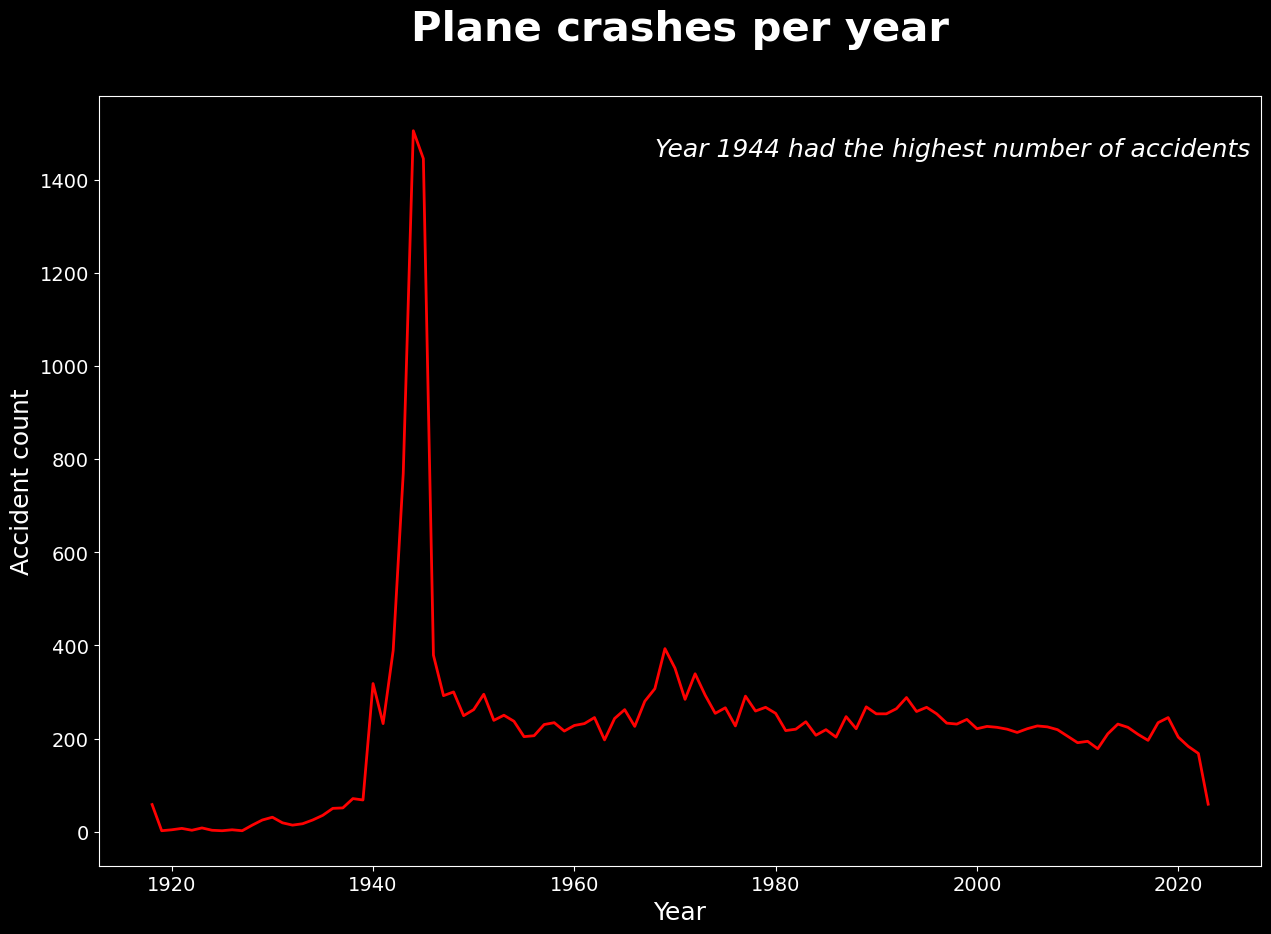

In [25]:
#start with the creation of graphs
accident_count_by_year = df_f.groupby("year").size()
plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
plt.plot(accident_count_by_year.index, accident_count_by_year.values, linewidth=2, color='red')
plt.xlabel("Year", size = 18)
plt.ylabel("Accident count", size = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Plane crashes per year", size = 30, fontweight='bold',pad=40)
plt.annotate("Year 1944 had the highest number of accidents", xy = (1968, 1450), size = 18, fontstyle='italic')
plt.show()



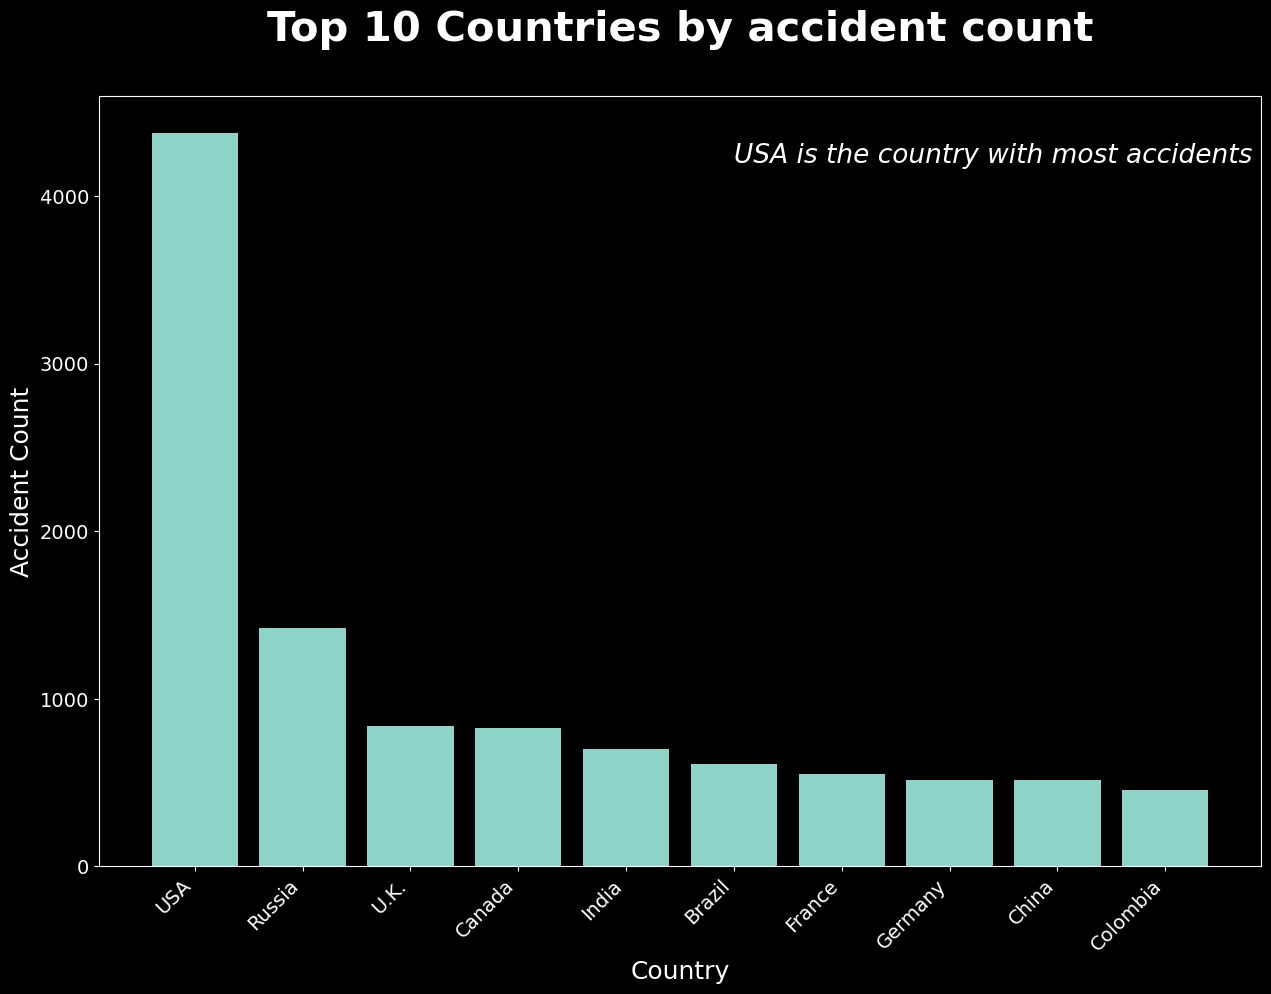

In [24]:

plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
filtered_df = df_f[df_f['country'] != "Unknown country"]
accident_count_by_country = filtered_df['country'].value_counts()
top_countries = accident_count_by_country.head(10)
plt.bar(top_countries.index, top_countries.values)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Accident Count", fontsize=18)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Top 10 Countries by accident count", size=30, fontweight='bold', pad=40)
plt.annotate("USA is the country with most accidents", xy = ("Brazil", 4200), size = 19, fontstyle='italic')
plt.show()

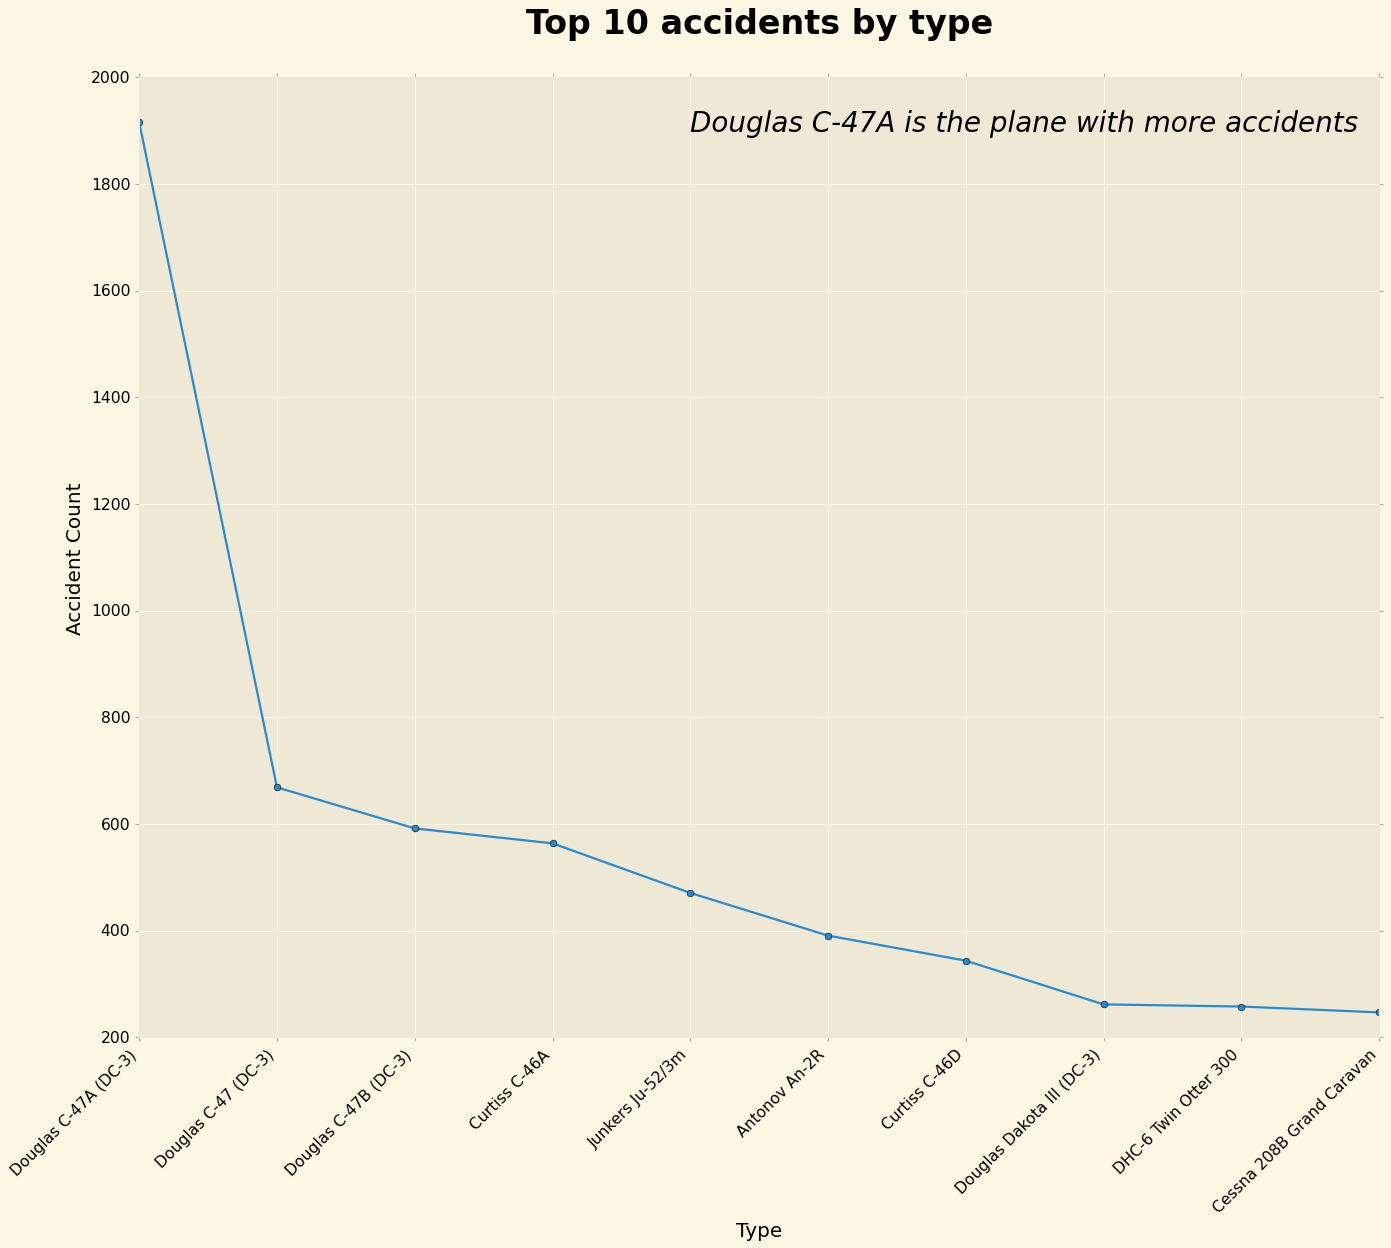

In [99]:
plt.figure(figsize=(20, 15))
plt.style.use('Solarize_Light2')
accident_count_by_type = df_f['type'].value_counts()
top_types = accident_count_by_type.head(10)
plt.plot(top_types.index, top_types.values, marker='o')
plt.xlabel("Type", fontsize=18, color= "black")
plt.ylabel("Accident Count", fontsize=18, color= "black")
plt.xticks(rotation=45, ha="right", fontsize=14, color= "black")
plt.yticks(fontsize=14, color= "black")
plt.title("Top 10 accidents by type", size=30, color = "black", fontweight='bold', pad=40)
plt.annotate("Douglas C-47A is the plane with more accidents", xy = ("Junkers Ju-52/3m", 1900), size = 25, fontstyle='italic', color ="black")
plt.show()

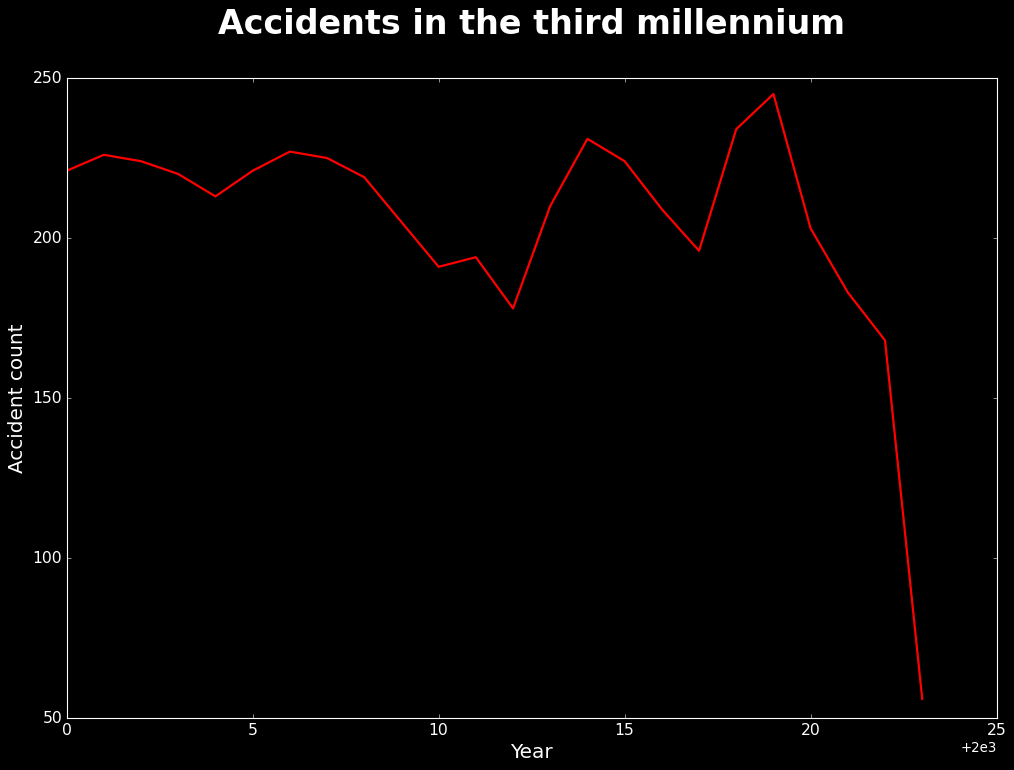

In [92]:
df_f['year'] = pd.to_numeric(df_f['year'])
filtered_df = df_f[(df_f['year'] >= 2000) & (df_f['year'] <= 2023)]
accident_count_by_year = filtered_df.groupby("year").size()
plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
plt.plot(accident_count_by_year.index, accident_count_by_year.values, linewidth=2, color='red')
plt.xlabel("Year", size = 18)
plt.ylabel("Accident count", size = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Accidents in the third millennium", size = 30, fontweight='bold',pad=40)
plt.show()


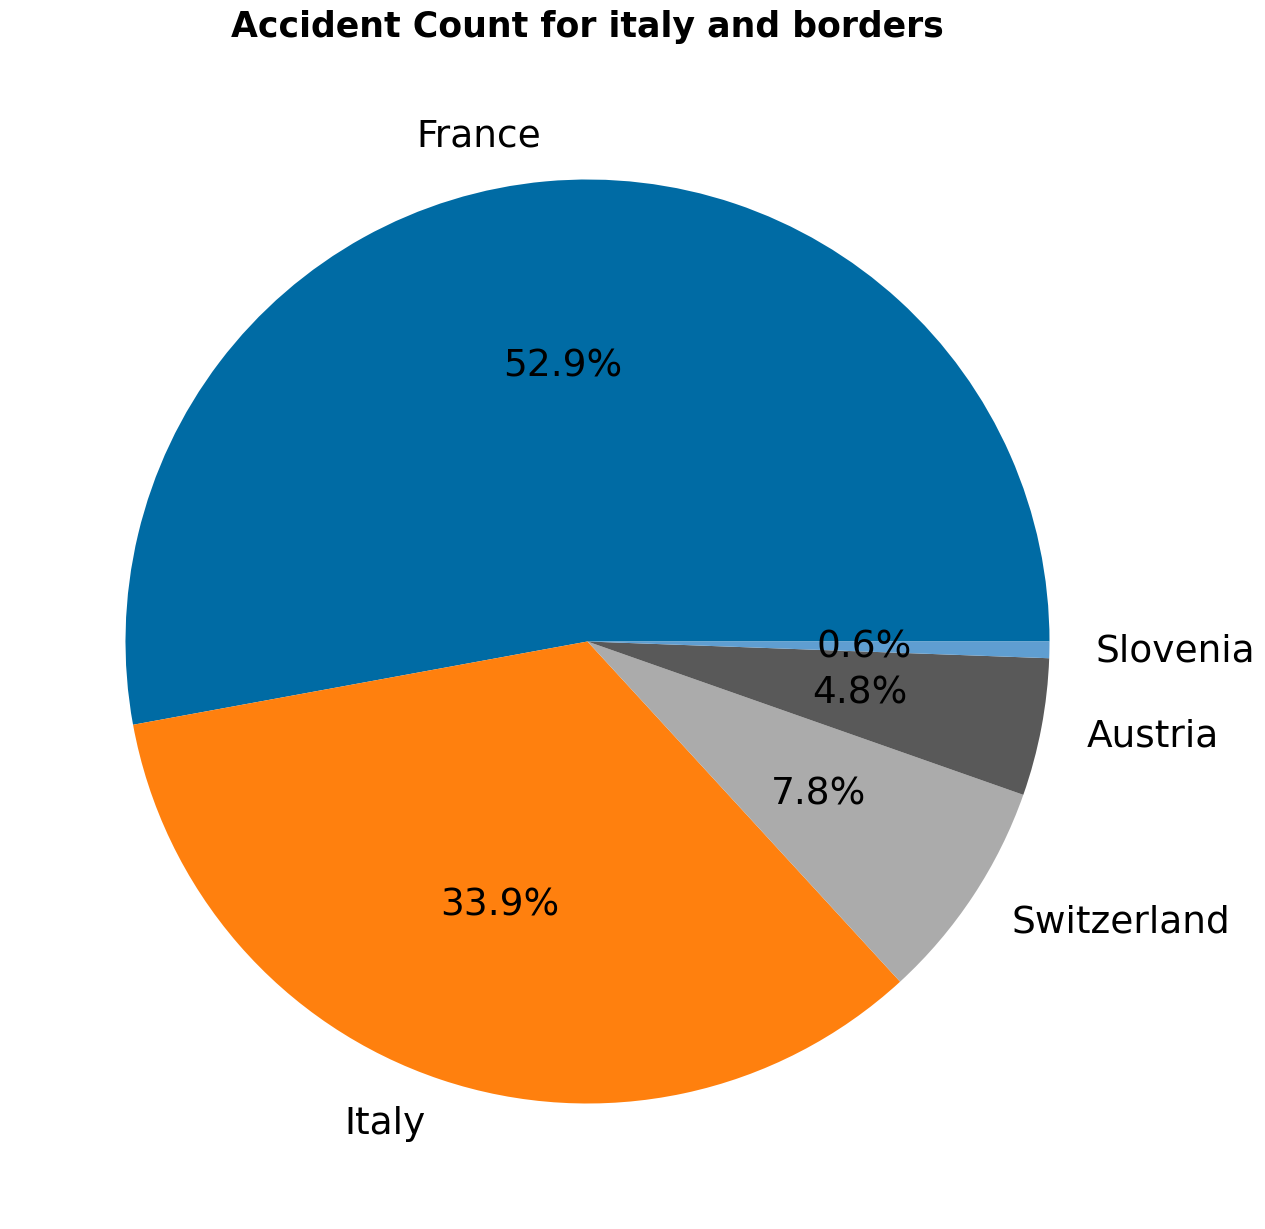

In [60]:
plt.style.use('tableau-colorblind10')
selected_countries = ["France", "Italy", "Switzerland", "Austria", "Slovenia"]
filtered_df = df_f[df_f['country'].isin(selected_countries)]
accident_count_by_country = filtered_df['country'].value_counts()
plt.figure(figsize=(20, 15),facecolor='white')
plt.pie(accident_count_by_country.values, labels=accident_count_by_country.index,autopct='%1.1f%%', textprops={'fontsize': 27,'color': 'black'})
plt.title("Accident Count for italy and borders", size=25, fontweight='bold', pad=20,color ="black")
plt.show()

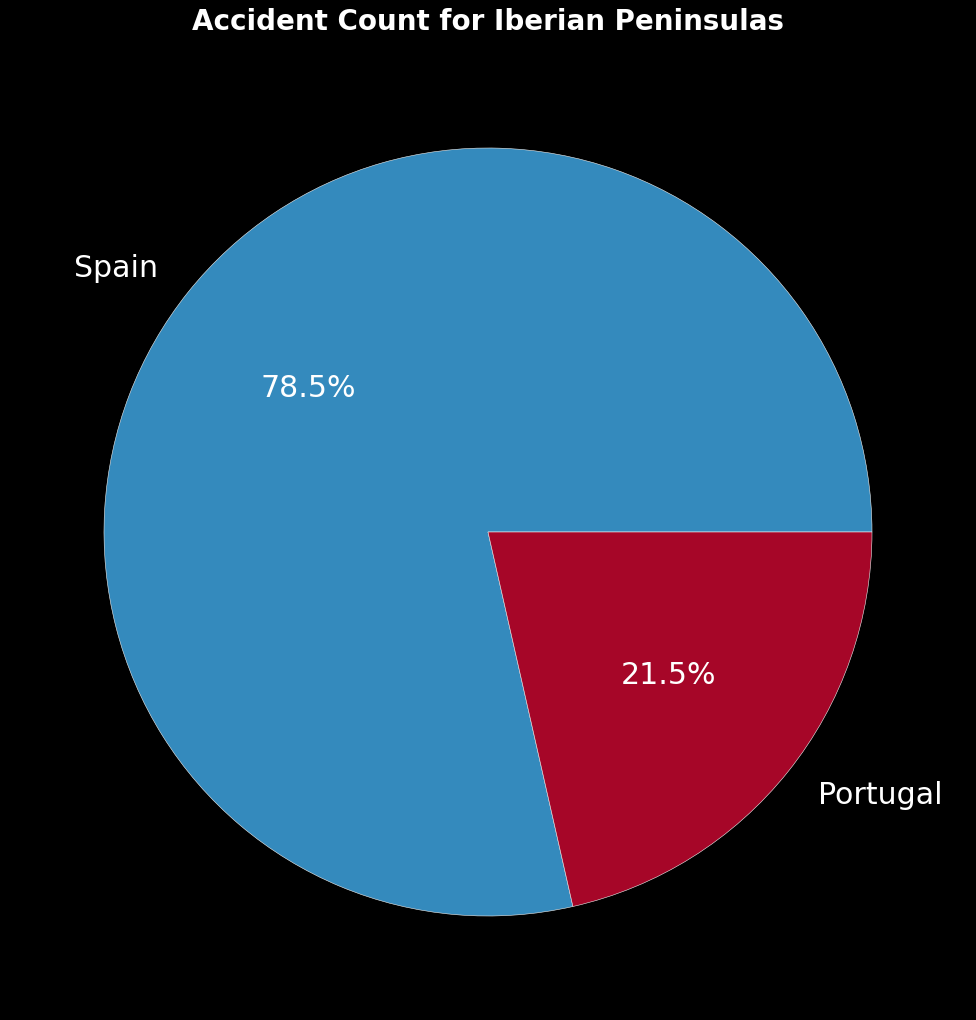

In [84]:
plt.style.use('bmh')
selected_countries = ["Spain", "Portugal"]
filtered_df = df_f[df_f['country'].isin(selected_countries)]
accident_count_by_country = filtered_df['country'].value_counts()
plt.figure(figsize=(20, 15),facecolor='black')
plt.pie(accident_count_by_country.values, labels=accident_count_by_country.index,autopct='%1.1f%%', textprops={'fontsize': 27, "color":"White"})
plt.title("Accident Count for Iberian Peninsulas", size=25, fontweight='bold', pad=20,color = "white")
plt.show()

C:\Users\Giacomo\AppData\Local\Temp\ipykernel_12840\563956961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_germany['year'] = pd.to_numeric(filtered_df_germany['year'])


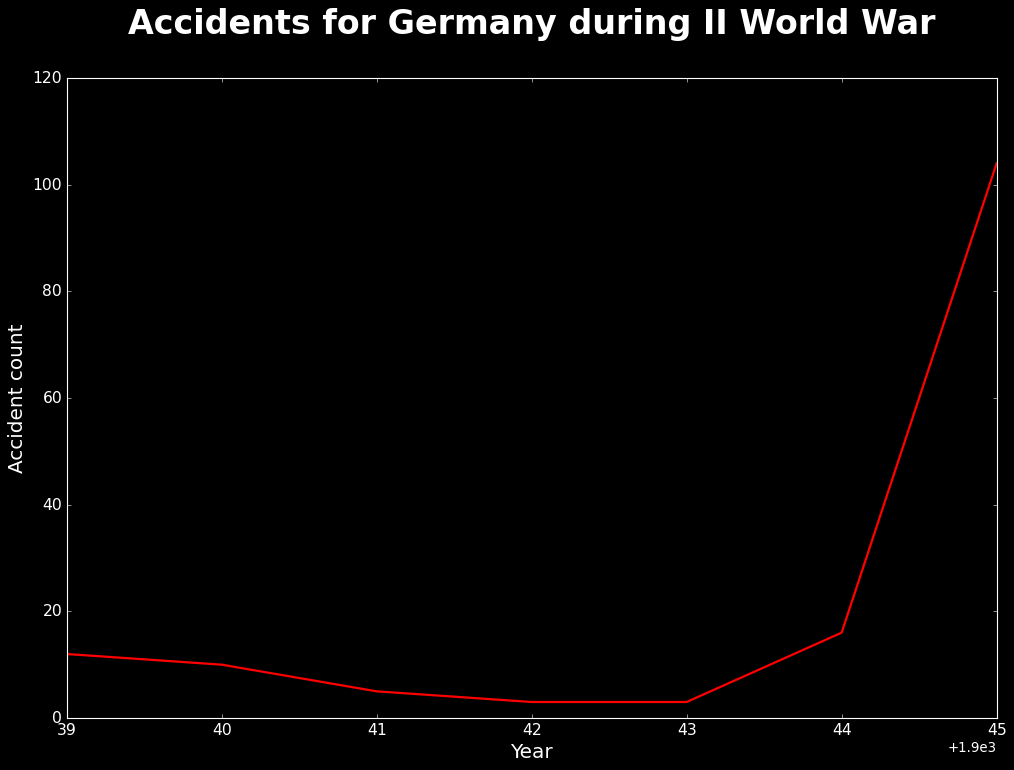

In [93]:
filtered_df_germany = df_f[df_f['country'] == 'Germany']
filtered_df_germany['year'] = pd.to_numeric(filtered_df_germany['year'])
filtered_df_germany = filtered_df_germany[(filtered_df_germany['year'] >= 1939) & (filtered_df_germany['year'] <= 1945)]
accident_count_by_year = filtered_df_germany.groupby("year").size()
plt.style.use('dark_background')
plt.figure(figsize = (15, 10))
plt.plot(accident_count_by_year.index, accident_count_by_year.values, linewidth=2, color='red')
plt.xlabel("Year", size = 18)
plt.ylabel("Accident count", size = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.title("Accidents for Germany during II World War", size = 30, fontweight='bold',pad=40)
plt.show()


In [ ]:
!pip install squarify

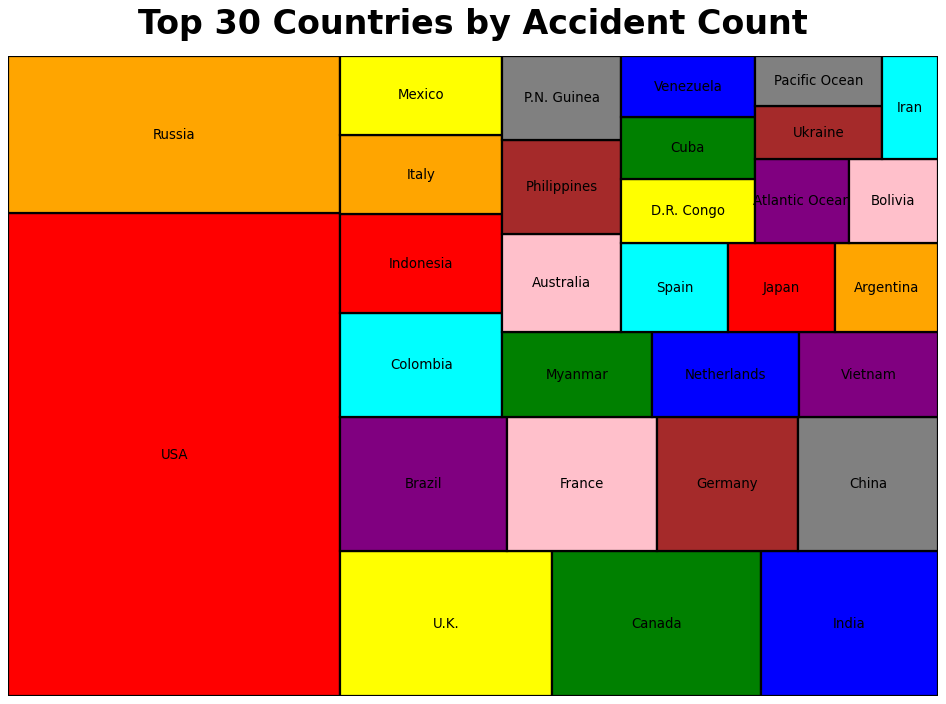

In [128]:
import squarify
filtered_df = df_f[df_f['country'] != "Unknown country"]
accident_count_by_country = filtered_df['country'].value_counts()
top_countries = accident_count_by_country.head(30)
plt.figure(figsize=(15, 10),facecolor='white')
plot= squarify.plot(sizes=top_countries.values, label=top_countries.index, color=['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan'], alpha=1,edgecolor='black',linewidth=2)
plt.title("Top 30 Countries by Accident Count", size=30, fontweight='bold', pad=20, color ="black")
plt.axis('off')

for text in plot.texts:
    text.set_color('black')
    
plt.show()